In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.special import erfc
from IPython.display import Latex, Math

import warnings
warnings.filterwarnings('ignore')

# Lecture 9-  Conservative Transport #
---

## Motivation ##

Groundwater is used by almost half of the world population for drinking purposes. Therefore maintaining it's quality is very important, not only for human consumption but also for the maintenance of the ecosystem that we live. Groundwater contamination artificial (e.g., from human intervention) or natural (e.g., flood) can impact groundwater quality. Of these two, artificial contamination, e.g., industrial development, improper waste management is more alarming one as quite few contamination (e.g, fuels, radioactive waste) can remain in groundwater for very long time. In this lecture we will learn about processes affecting groundwater quality issues. It has to be mentioned that when we talk about groundwater quality, we mean the change in the original state of groundwater. At many instances this can be groundwater quality can be defined in terms of regulatory standards. 

## Groundwater flow and transport ##

Before we begin, let us distinguish between _groundwater flow_ and _transport_ problems. With _flow_ problems we deal with groundwater only, whereas with _transport_ problem we deal with particles flowing along with groundwater. It is not required that particle be a contaminant. The particle in this sense may be defines as anything other than water. We begin with a groundwater contamination scenario.

```{figure} images/T9_f1a.png
---
scale: 40%
align: center
name: Trans_c_2D
---
Contamination scenario
```

In the figure, the chemicals (contaminants) first enters the _vadose zone_, an unstatured part of the subsurface from the ground surface. The entry is faciliated with phenomenan such as rainfall. As only limited water are available and there are almost no continuous horizontal flow, the contaminants, mostly as a pure phase,  in this zone often travels vertically until it reaches the groundwater table - a boundary between an unstaturated and saturated subsurface. Beneath the water-table, the contaminants mixes with the flowing groundwater and spreads both vertically and horizontally along the saturated zone resulting to a development of a contaminant plume.

**In this course we learn only of contamination in the saturated zone.**

Before we approach the transport processes, it is important that we learn about the category of groundwater problem. At the top-most level groundwater transport problem is categorized as

> 1. **Conservative transport problem**: The transport problem which involves only movement of particles along with the water flow. We can call this as non-reactive transport problems, e.g., dye or (inert) salt transport. In this lecture we deal with this transport type.
> 2. **Reactive transport problem**: The transport problem that deals with reaction along with the flow of particles. This is compound problem type in which flow properties, the conservative part of the transport problem, as well as the chemical properties (and reactions) is considered. Several types of reactions are possible and they need to be considered. We will deal with this type of transport problem in the next lecture.



## Conservative transport processes ##

As defined earlier and also shown in the figure, the three main processes active in conservative transport in groundwater are:

> 1. Advection
> 2. Dispersion
> 3. Diffusion

We discuss each of these process, learn to quantify them and then combine them to set-up of our system equation for groundwater transport problem. 

### Advection ###

<u>Advection</u>, also called **convection**, is the transport of components (matter or also energy) due to moving medium. The moving medium, i.e., _a carrier_ is, usually groundwater. Thus, quantities that characterizes flow also characterizes advective transport.
    
Advective transport is not limited to groundwater system. Heating circuit, sailplaning are examples of convection of heat. Similarly, movement of suspended particles in the surface water or by the wind are few examples of advective transport in non-groundwater systems.
    
The term **convection** is more often associated with energy transport, whereas **advection** is frequently used for transport of the matter.

### 1D Advection and advective mass rate ###

2D studies are more often the case used in exploring groundwater and its processes. 1D studies can also be sufficient to understand the **flow** dominated processes such as advection. Also, 1D study is more suitable in lab column studies, as often length of pipes are many times larger that its diameter. For advection, considering 1D pipe flow, to be considered are:

- Steady-state flow with discharge $Q$ [L$^3$T$^{-1}$]
- Cross-sectional area, a constant quantity,  $A$ [L$^2$]
- Fluid continuity equation: $Q= n_e\cdot A\cdot v$ = constant, with $n_e$[-] is the **effective** porosity and $v$ [LT$^{-1}$] the **linear** groundwater velocity 

With these information, the advective mass rate $J_{adv}$ [MT$^{-1}$] is obtained from:

$$
J_{adv} = Q\cdot C
$$
with concentration $C$ [ML$^{-3}$].

Since $A$ is constant and so is $Q$, then $v$ has to be constant too. The consequence of qunatities being constant is that the transport of matter, in  resembles a horizontal pushing.

In [2]:
print("A quick example: You can change the provided value\n")

print("Let us find advective mass rate exiting a column.\n\nProvided are:")

R_1 = 0.25 # cm, radius of the column
ne_1 = 0.3 # (), effective porosity
v_1 = 0.02 # cm/s, velocity
C_1   = 2 # mg/L, concentration

# intermediate calculation
A_1 = np.pi*R_1**2 # Column surface area
Q_1 = ne_1*A_1*v_1 # cm^3/s, discharge

#solution
J_adv = Q_1*C_1

print("Radius = {} cm\nWater flow rate = {} cm/s\nInput concentration = {} mg/L and\nEffective porosity = {:02.2f}".format(R_1, v_1, C_1, ne_1), "\n")
print("The resulting advective mass flow rate is {:02.4f} mg/s".format(J_adv))


A quick example: You can change the provided value

Let us find advective mass rate exiting a column.

Provided are:
Radius = 0.25 cm
Water flow rate = 0.02 cm/s
Input concentration = 2 mg/L and
Effective porosity = 0.30 

The resulting advective mass flow rate is 0.0024 mg/s



Simulating advective flow



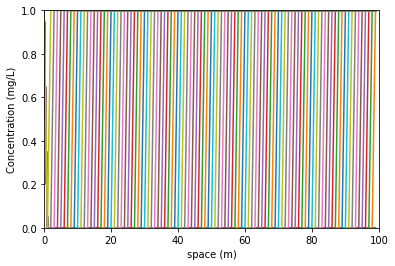

In [3]:
# simulating advection 1D

print("\nSimulating advective flow\n")

import numpy as np
import matplotlib.pyplot as plt

N= 100 # number of cell - i.e. compartment a column is divided into
c0 = 0 # initial concentration
cin = 1 # input concentration
c1 = c0*np.ones((1,N)) # initializing - i.e., all compartment has zero conc.

for i in range(1, N+1): # number of time steps- we make it equivalent to cell number.
    c1 = np.roll(c1, N-1) # "roll" is numpy function for shifting
    c1[0,0] = cin # make the first cell = cin again. This is because np.roll uses the last value as the first one.
    
    plt.plot(c1.T)
    plt.xlabel("space (m)"); plt.ylabel("Concentration (mg/L)")
    plt.xlim([0,N]); plt.ylim([0,cin])

### 1D advection in variable cross-section ### 

In the just completed case, the column was of uniform diameter. So, what happens when:

```{figure} images/T9_f2.png
---
:figclass: margin
scale: 40%
align: center
name: Adv_2
---
Advection in variable field
```

In this case the equation of continuity has to be explored. The continuity equation for variable cross section is:

\begin{align*}
Q_1 &=Q_2 \\
A_1 v_1 &= A_2 v_2
\end{align*}

As $Q_1=Q_2= Q$, and when $A$ changes then, $v$ has to change as well. In this case considering that $n_e$ is spatially constant, $v$ will be inversely proportional to the cross-section. i.e., increase in $A$ will result to decrease in $v$ and vice-versa.

Based on this, the mass (patch in the figure), is actually equal in both figure and they are onyl spread out laterally. In other words, as cross-section increased and velocity decreased, the mass extension is reduced along the flow direction. The effect of _advection_ is that the _concentration_, which is the total mass per litre of groundwater, remains unchanged in the patched mass area. 

### Is advection enough? ###

Probably not. Advection may only be possible in uniformly packed porous medium with also perfectly uniform particle size distribution of medium particles. This is rather exception. In normal cases, the the particle transport will spread out leading some matter exiting earlier then remaining others. This is explained by process called **mechanical dispersion**. 

```{figure} images/T9_f3.png
---
scale: 70%
align: center
name: ad-dis
---
Advection-dispersion processes
```


> Note: 1D only have longitudinal dispersivity. Transverse dispersivity is 2D/3D property 
This is a footnote reference.

## Mechanical dispersion ##

**Mechanical dispersion** can result due to alone or combination of several porous medium and flow hydraulics properties. In general the following three reasons are considered when explaining the mechanical dispersion process:

```{figure} images/T9_f4.png
---
scale: 40%
align: center
name: Mech-dis
---
Mechanical dispersion mechanisms
```


> a.  The varying flow velocities across each individual pore. A **parabolic velocity profile** results as close to the surface there is resistance to flow and the maximum velocity is at the centreline.

> b. Different flow velocities in different pores. Pore sizes can vary due to different particle sizes and also due to non-uniform compaction. Larger pore will then have higher velocity compared to smaller pores.

> c. Varying flow paths of individual flow streams. The water streams can take its own path around the particles. This can lead some taking shorter exit path compared to other streams.

These effects, either individually or any combination, result in different transport distances and different transport times, respectively. Thus, matter carried by streamline will also have different transport distances and different times- or the solute are **dispersed**.

### Dispersive Mass flow rate ### 

The dispersive mass flow rate $J_{disp, m}$ [MT$^{-1}$] due to mechanical dispersion in porous media is:

- propertional to the cross-sectional area $A$
- proportional to the linear velocity, $v$
- proportional to the difference in concentration $\Delta C$ between transport points
- inversely propertional to the transport distance $L$

These jointly results to $J_{disp, m}$:
\begin{align*}
J_{disp, m} &\propto -n_e \cdot A \cdot v \cdot \frac{\Delta C}{L}\\
J_{disp, m} &= - \alpha \cdot n_e \cdot A \cdot v \cdot \frac{\Delta C}{L}
\end{align*}

The ratio $\frac{\Delta C}{L}$ [ML$^{-4}$] is called **concentration gradient**. The **negative** sign is to indicate that dispersive mass flow is from region with higher concentrations to regions with lower concentrations.

$\alpha$[L] is proportionality constant called **dispersivity**. This quantity equals the value of the dispersive mass flow through a unit cross-sectional area for a unit concentration gradient and a unit linear velocity.



### Dispersivity and Mechanical Dispersion coefficient ###

It is more convinient to use dispersivity together with groundwater velocity. Thus, a qunatity called **mechnical dispersion coefficient** $D_{mech}$ [L$^2$T$^{-1}$] is defined as:

$$
D_{mech} = \alpha \cdot v
$$

Following the equation, the $D_{mech}$ is a qunatity that is dependent on both the properties of porous medium, which is characterized by dispersivity ($\alpha$) and the property of flow hydrauclics that is characterized by flow velocity ($v$).

Using mechanical dispersion coefficient, the dispersive mass flow can be redefine as

$$
J_{disp, m} = -  n_e \cdot A \cdot D_{mech} \cdot \frac{\Delta C}{L}
$$


In [4]:
print("A quick example: You can change the provided values\n")

print("Let us find dispersive mass rate exiting a column.\n\nProvided are:")

L_2  = 50 # cm, length of the pipe
R_2  = 0.25 # cm, radius of the column
ne_2 = 0.3 # (), effective porosity
v_2  = 0.02 # cm/s, velocity
Ci_2 = 10 # mg/L, inlet concentration
Co_2 = 2 # mg/L, outlet concentration
a_2  = 1 # cm, dispersivity

# intermediate calculation
A_2 = np.pi*R_2**2 # Column surface area
Cg_2 = (Ci_2-Co_2)/L_2 # mg/L-cm, concentration gradient

#solution
Jm_dis = ne_2*A_2*a_2*v_2*Cg_2



print("Length of column = {} cm\nRadius of column = {} cm\nWater flow rate = {} cm/s\nInlet concentration = {} mg/L\nOutlet concentration = {} mg/L \
\nEffective porosity = {:02.2f}\nDispersivity = {}".format(L_2,R_2, v_2, Ci_2, Co_2,ne_2, a_2), "\n")

print("The resulting dispersive mass flow is {:02.4f} mg/s".format(Jm_dis))


A quick example: You can change the provided values

Let us find dispersive mass rate exiting a column.

Provided are:
Length of column = 50 cm
Radius of column = 0.25 cm
Water flow rate = 0.02 cm/s
Inlet concentration = 10 mg/L
Outlet concentration = 2 mg/L 
Effective porosity = 0.30
Dispersivity = 1 

The resulting dispersive mass flow is 0.0002 mg/s



Simulating mechanical dispersion
You can change input values to see the effect


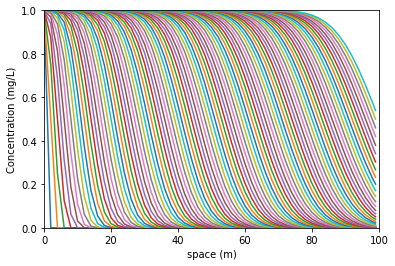

In [5]:
#Simulating mechanical dispersion

print("\nSimulating mechanical dispersion\nYou can change input values to see the effect" )

N = 100
c0 = 0
cin = 1
Neumann = 0.5; # Neumann number ensures that transport is combination of adv and disp.
c1 = c0*np.ones((1,N))
c2 = c0*np.zeros((1,N))
c=c1

for i in range(1, N+1):
    
    #dispersion component using Neumann number (D. Dt/Dx² -D= Delta )
    for i in range(2,N):
        c2[0,i-1] = c1[0,i-1] + Neumann*(c1[0,i-2]-2*c1[0,i-1]+c1[0,i]); # FD stensil for d²C/dx²
           
    c2[0,0] = c1[0,0] + Neumann*(cin - 2*c1[0,0]+c1[0,1]); # the first cell value
    c2[0,N-1] = c1[0,N-1] + Neumann*(c1[0,N-2] - c1[0,N-1]); # the lass cell value
    c1 =c2;
    
    #shifting cell - advection component
    c1 = np.roll(c1, N+1);  
    c1[0,0] = cin;
    
    plt.plot(c1.T);
    plt.xlabel("space (m)"); plt.ylabel("Concentration (mg/L)")
    plt.xlim([0,N]); plt.ylim([0,cin])


### Hydrodynamic Dispersion ###

In groundwater transport study mechanical dispersion and diffusion coefficient are summed up and a common term **hydrodynamic dispersion** $D_{hyd}$ [L$^2$T$^{-1}$]. However, the diffusion coefficient $D$ used in diffusion mass flow equation is valid for liquid water. Groundwater exist with solid porous medium. Thus, pore diffusion coefficient $D_p$ [L$^2$T$^{-1}$] is considered. In general:

$$
D_p < D
$$

and it is frequently assumed that

$$
D_p = n_e \cdot D
$$

where $n_e$ is effectively porosity. Several other emperical formulae are found in literature relating $D$ and $D_p$. With $D_p$, defined the **hydrodynamic dispersion** is defined as:

$$
D_{hyd} = D_{mech} + D_p = \alpha \cdot v + D_p = \alpha \cdot v + n_e \cdot D
$$

## 1D Diffusion ##

Contrasting with the advection and mechanical dispersion - mostly a flow influenced transport processes, the **diffusion** led transport depends on **concentration gradient**, i.e., flow is not required for transport.

The 1D diffusion transpor is found be:
- proportional to the cross-sectional area $A$.
- proportional to the concentration gradient $\frac{\Delta C}{L}$

The diffusive mass transport $J_{diff}$ [MT$^{-1}$] is thus:

\begin{align*}
J_{diff} &\propto - A\cdot\frac{\Delta C}{L}\\
J_{diff} &= - D \cdot A\cdot\frac{\Delta C}{L}\\
\end{align*} 

$D$ [L$^2$T$^{-1}$] is the proportional coefficient called diffusion coefficient. And, the negative sign is for indicating that the flow is from the region with higher concentration to the region with lower concentration. As can be observed from the equation, $D$ will equal $J_{diff}$ for unit cross-section for a unit concentration gradient. The value of $D$ of dissolved chemicals in liquid water (not exactly in groundwater, which is water in porous media) are mostly in the range from $10^{-10}$ m$^2$/s -  $10^{-9}$ m$^2$/s. The value of $D$ of chemicals in gases are larger by about four orders of magnitude, i.e., the range in this case from from $10^{-6}$ m$^2$/s -  $10^{-5}$ m$^2$/s.

The diffusion phenomena can be demonstrated from the figure below. The fig shows spread of solute in the absence of flow ($v=0$ and consequently $Q=0$). The spread continues with time $t$ until solute concentration in the entire medium is leveled.

```{figure} images/T9_f5.png
---
scale: 60%
align: center
name: Dif
---
The diffusion phenomena
```




Simulating diffusion 
You can change input values to see the effect



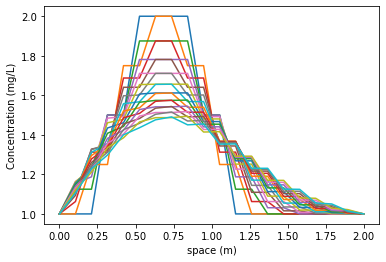

In [6]:
print("\nSimulating diffusion \nYou can change input values to see the effect\n" ) 
# Initial Conditions
nx = 20
dx = 2 / (nx - 1) # number of space compartment
nt = 20    #the number of timesteps we want to calculate
Neumann = 0.5 # [ ], Neumann number = D. Dt/Dx² -D= Delta

u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

# Calculation
un = np.ones(nx) #our placeholder array, un, to advance the solution in time
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + Neumann * (un[i+1] - 2 * un[i] + un[i-1])
        
    plt.plot(np.linspace(0, 2, nx), u);
    plt.xlabel("space (m)"); plt.ylabel("Concentration (mg/L)");

In [7]:
print("A quick example: You can change the provided values\n")

print("Let us find diffusive mass rate exiting a column.\n\nProvided are:")

L_3  = 50 # cm, length of the columns
R_3  = 0.25 # cm, radius of the column
Ci_3 = 10 # mg/L, inlet concentration
Co_3 = 2 # mg/L, outlet concentration
D_3  = 10**-5 # cm^2/s, dispersivity

# intermediate calculation
A_3 = np.pi*R_3**2 # Column surface area
Cg_3 = (Ci_3-Co_3)/L_3 # mg/L-cm, concentration gradient

#solution
Jm_diff = A_3*D_3*Cg_3


print("Radius = {} cm\nLength of the column = {} cm/s\nInlet concentration = {} mg/L\nOutlet concentration = {} mg/L \
\nDiffusion Coefficient = {}".format(R_3, L_3, Ci_3, Co_3, D_3), "\n")

print("The resulting dispersive mass flux is {:02.7f} mg/s".format(Jm_diff))

A quick example: You can change the provided values

Let us find diffusive mass rate exiting a column.

Provided are:
Radius = 0.25 cm
Length of the column = 50 cm/s
Inlet concentration = 10 mg/L
Outlet concentration = 2 mg/L 
Diffusion Coefficient = 1e-05 

The resulting dispersive mass flux is 0.0000003 mg/s


### Hydrodynamic Dispersion ###

In groundwater transport study mechanical dispersion and diffusion coefficient are summed up and a common term **hydrodynamic dispersion** $D_{hyd}$ [L$^2$T$^{-1}$]. However, the diffusion coefficient $D$ used in diffusion mass flow equation is valid for liquid water. Groundwater exist with solid porous medium. Thus, pore diffusion coefficient $D_p$ [L$^2$T$^{-1}$] is considered. In general:

$$
D_p < D
$$

and it is frequently assumed that

$$
D_p = n_e \cdot D
$$

where $n_e$ is effectively porosity. Several other emperical formulae are found in literature relating $D$ and $D_p$. With $D_p$, defined the **hydrodynamic dispersion** is defined as:

$$
D_{hyd} = D_{mech} + D_p = \alpha \cdot v + D_p = \alpha \cdot v + n_e \cdot D
$$

## Joint Action of Transport Processes

The spread of conservative solute in an unconsolidated aquifer can be considered as a combined effect or superposition of advection, mechanical dispersion and pore diffusion processes. Thus, for the complete description of the transport process is then:

$$
J = J_{adv} + J_{disp, m} + J_{diff} = J_adv + J_{disp, h}
$$

i.e, 

$$
J = n_e \cdot A \cdot A \cdot v \cdot C - n_e \cdot A\cdot\alpha \cdot v 
\frac{\Delta C}{L} - n_e \cdot A\cdot D_p \cdot \frac{\Delta C}{L}
$$

which simplifies to

$$
J = n_e \cdot A\cdot v \cdot C - n_e \cdot A \cdot D_hyd \cdot\frac{\Delta C}{L}
$$

Thus the spread of solutes due to transport processes can be quantified by combining a mass budget and the corresponding laws of motion. The combination results in a **Transport Equation**, which is more commonly known as _advection-dispersion equation_ or also, when energy transport is generally the case,  as _convection-dispersion equation_. The derivation of the transport equation can be found in standard hydrogeology texts. For the sake of completeness, the 1D (conservative) transport equation is:

$$
\frac{\partial C}{\partial x} = - v\frac{\partial C}{\partial x} + D_{hyd}\frac{\partial^2 C}{\partial x^2}
$$

The solution of transport equation is thus Concentration varying in space and time, i.e., $C(x,t)$.



## Analysis of conservative transport problem ##

Several analytical solutions (discussed in modeling chapter) are available that very often let us understand which type - e.g. advection dominant or dispersion dominant, of the problem exist. Very useful solution is provided by Ogata and Banks (1961). The solution for a particular initial and boundary conditions (see reference text) is given as:

$$
C(x, t) = \frac{1}{2}C_0 \Bigg[\text{erfc}\Bigg(\frac{x-v\cdot t}{2\sqrt{D_x \cdot t}}\Bigg)+ \exp\Bigg(\frac{v\cdot x}{D_x}\Bigg)\cdot \text{erfc}\Bigg(\frac{x+v\cdot t}{2\sqrt{D_x \cdot t}}\Bigg)\Bigg]
$$

where, $C_0$ is continuous input concentration. More often in groundwater studies, the term $\text{erfc}\Big(\frac{x+v\cdot t}{2\sqrt{D_x \cdot t}}\Big)\to 0 $. This simplifies the Ogata and Banks (1961) solution to

$$
C(x, t) = \frac{1}{2}C_0 \Bigg[\text{erfc}\Bigg(\frac{x-v\cdot t}{2\sqrt{D_x \cdot t}}\Bigg)\Bigg]
$$


This solution can be used to evaluate the dominant front between advection and dispersion for example.

```{sidebar} Ogata and Banks (1961) scenario
```{figure} images/T9_f6.png
---
scale: 40%
align: right
name: j_ad_dis
---
Joint action of advection and dispersion
```  ```

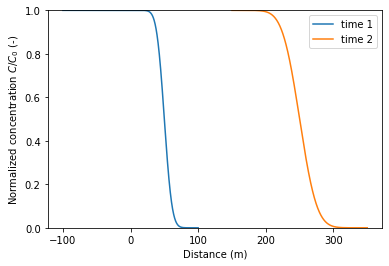

In [8]:
# simulating Ogata and Banks (1961) for evaluation dominant front.

x = np.linspace(-100, 100, 1000)
C0 = 10
Dx = 4
v = 5# change v and t together  to observe the dominant front.
t = 10 # 


C = 0.5*C0*erfc((x-v*t)/(2*np.sqrt(Dx*t))) 
plt.plot(x, C/C0)

t2 = t*5
x1 = x + v*t2
C1 = 0.5*C0*erfc((x1-v*t2)/(2*np.sqrt(Dx*t2))) 
plt.plot(x1, C1/C0)
plt.ylim((0, 1))
plt.ylabel(r"Normalized concentration $C/C_0$ (-)" )
plt.xlabel("Distance (m)");
plt.legend(["time 1", "time 2"]);

In [9]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" 

Latex("A quick example to present the relative importance of different mass flow in the transport of solute \n")

A  =  1 # m², =ne.A,  cross-sectional area, with ne= eff. porosity
v  =  1 # m/d, linear velocity
C  =  1 # mg/L = 1 g/m^3, concentration
D  =  1 # m, transport disntance
gr =  1 # g/m⁴, Delta C/L, conc. gradient
Al =  0.1 # m, dispersivity
Dp =  10**-5 # m²/d, pore diff. coefficient

# computation
Jadv = A*v*C
Jdisp = A*Al*v*gr
Jdiff = A*Dp*gr


from IPython.display import Latex
Latex(r"""\begin{eqnarray}
J_{adv} & = n_e\cdot A \cdot v \cdot C \\
J_{dis} & = n_e\cdot A \cdot \alpha  \cdot  v \cdot \frac{\Delta C}{L}  \\
J_{diff} & = n_e\cdot A \cdot D_p  \cdot \frac{\Delta C}{L} 
\end{eqnarray}""")


#output
print("\n The contribution of advective flow is: {0:0.2f}".format(Jadv), "g/d \n")
print("The contribution of dispersive flow is: {0:0.2f}".format(Jdisp), "g/d \n")
print("The contribution of diffusive flow is: {0:0.1e}".format(Jdiff), "g/d \n")



 The contribution of advective flow is: 1.00 g/d 

The contribution of dispersive flow is: 0.10 g/d 

The contribution of diffusive flow is: 1.0e-05 g/d 



In general, $J_{adv} > J_{dis} $ and  $J_{disp} >> J_{diff} $               

## Concnetration Profiles and Breakthrough Curves ##

_Concentration profiles_ and _Breakthrough Curves_ are very generally used to visualize and analyze the solute transport results. 

**Conentration profiles** represents  the solute concentration as a function of a space coordinate at fixed time level. Normalized concentration $C/C_0$, with $C_0$ is geneally used in $y$-axis against distance $x$ along $x-$axis.

The _concentration profile_ can be visualize as in the figure below:

```{figure} images/T9_f7.png
---
scale: 50%
align: center
name: C_profile
---
Concentration profile
```



An example code for obtaining concentration profile 



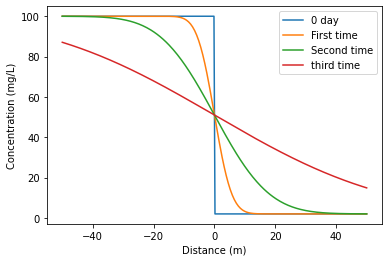

In [10]:
print("An example code for obtaining concentration profile \n")

# Input        
Cb = 100 # mg/L  # 
Ca = 2 # mg/L  
D = 1 # m²/d  
x = np.linspace(-50, 50, 300)
t = [0, 10, 100, 1000] # change time as you like - limit to four

# dont change anything from here

def f1(t): 
    for i in t:
        A = 2*np.sqrt(D*i)
        C = Ca + (Cb-Ca)/2 * erfc(x/A)
        
        plt.plot(x, C)
        label = ["0 day", "First time", "Second time", "third time"]
        plt.legend(label); 
        plt.ylabel("Concentration (mg/L)"); plt.xlabel("Distance (m)")

f1(t) # evaluate


**Breakthrough Curves**, an alternative to _concentration profile_ provides the solute concentration as a function of time at specified observation locations, i.e., along $y-$axis $C$ or normalized $C/C_0$ is used and along the $x-$axis time $t$ information is provided. The graphics below schematically illustrates th _breakthrough curve_ visualization


```{figure} images/T9_f7.png
---
scale: 50%
align: center
name: break_
---
The break-through curve
```



An example code for obtaining Breakthrough curve 



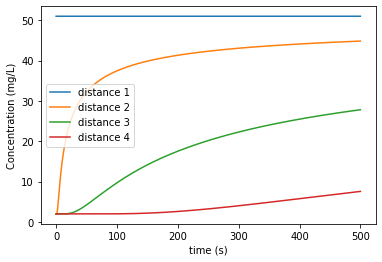

In [11]:
print("An example code for obtaining Breakthrough curve \n")

def f1(x): # dont change anything from here
    for i in X:
        A = 2*np.sqrt(D*t)
        C = Ca + (Cb-Ca)/2 * erfc(i/A) # Crank (1975) modified
        
        plt.plot(t, C)
        label = ["distance 1", "distance 2", "distance 3", "distance 4"]
        plt.legend(label); 
        plt.ylabel("Concentration (mg/L)"); plt.xlabel("time (s)")


# Input        
Cb = 100 # mg/L  # 
Ca = 2# mg/L  
D = 1 # m²/d  
t = np.linspace(0, 500, 5000)
X = [0, 5, 20, 50] # 0 = advective, change other numbers

f1(X) # evaluate

## Additional Tool ##

The additional tool: [1D-Advection-Dispersion Simulation Tool](/contents/tools/1D_advection_dispersion) simulates all the concepts that are provided above. The tool simulates:


- 1D solute transport in porous media (e.g., laboratory column)
- uses unifrom cross-section
- steady-state water flow
- input of tracer

The output are then:

- spreading of tracer due to advection and mechanical dispersion
- computation and graphical representation of a breakthrough curve
- comparison with measured data.
